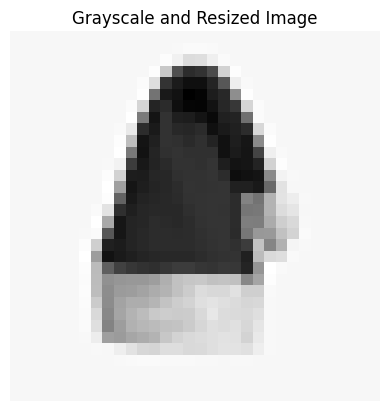

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and process the image
def load_and_preprocess_image(image_path, target_size=(32, 32)):
    # Open the image and convert to grayscale
    img = Image.open(image_path).convert('L')
    img = img.resize(target_size)  # Resize image to 32x32
    img_array = np.asarray(img) / 255.0  # Normalize pixel values (0 to 1)
    
    # Display the original and resized grayscale image
    plt.imshow(img_array, cmap='gray')
    plt.title("Grayscale and Resized Image")
    plt.axis('off')
    plt.show()
    
    return img_array

# Example usage
image_path = r"D:\6m_NIC\images\Cap.png"  # Provide the image path here
image_array = load_and_preprocess_image(image_path)


In [3]:
from qiskit import QuantumCircuit

# Function to create FRQI quantum circuit
def create_frqi_circuit(image_array):
    n = int(np.log2(image_array.size))  # Number of qubits needed
    qc = QuantumCircuit(n + 1)  # Additional qubit for encoding pixel intensities
    
    # Step 1: Apply Hadamard gate to all qubits for superposition
    for i in range(n):
        qc.h(i)
    
    # Step 2: Encode the image intensities into quantum states
    for idx, pixel_intensity in enumerate(image_array.flatten()):
        binary_idx = format(idx, '0' + str(n) + 'b')  # Convert index to binary
        for i, bit in enumerate(binary_idx):
            if bit == '0':
                qc.x(i)
        qc.cry(2 * np.arccos(np.sqrt(pixel_intensity)), n, list(range(n)))  # Controlled Ry rotation
        for i, bit in enumerate(binary_idx):
            if bit == '0':
                qc.x(i)
    
    # Display the quantum circuit for verification
    print("FRQI Quantum Circuit:")
    print(qc.draw(output='text'))  # Draw the quantum circuit
    
    return qc

# Example usage
qc = create_frqi_circuit(image_array)


FRQI Quantum Circuit:
      ┌───┐┌───┐┌─────────────┐     ┌───┐          ┌───┐                    »
 q_0: ┤ H ├┤ X ├┤ Ry(0.35612) ├─────┤ X ├──────────┤ X ├────────────────────»
      ├───┤├───┤└──────┬──────┘┌────┴───┴────┐     ├───┤          ┌───┐     »
 q_1: ┤ H ├┤ X ├───────┼───────┤ Ry(0.35612) ├─────┤ X ├──────────┤ X ├─────»
      ├───┤├───┤       │       └──────┬──────┘┌────┴───┴────┐     ├───┤     »
 q_2: ┤ H ├┤ X ├───────┼──────────────┼───────┤ Ry(0.35612) ├─────┤ X ├─────»
      ├───┤├───┤       │              │       └──────┬──────┘┌────┴───┴────┐»
 q_3: ┤ H ├┤ X ├───────┼──────────────┼──────────────┼───────┤ Ry(0.35612) ├»
      ├───┤├───┤       │              │              │       └──────┬──────┘»
 q_4: ┤ H ├┤ X ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤├───┤       │              │              │              │       »
 q_5: ┤ H ├┤ X ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤├───┤       │              │   

In [4]:
from qiskit import transpile
from qiskit_aer import Aer

# Function to simulate the quantum circuit and detect edges
def simulate_frqi_circuit(qc):
    # Step 3: Apply additional quantum gates to detect edges (e.g., Hadamard)
    n = qc.num_qubits - 1
    for i in range(n):
        qc.h(i)
    
    # Step 4: Simulate the quantum circuit
    backend = Aer.get_backend('aer_simulator')
    qc.measure_all()  # Measure all qubits
    t_qc = transpile(qc, backend)
    result = backend.run(t_qc, shots=1024).result()
    
    # Display the counts for quantum states
    counts = result.get_counts(qc)
    print("Measurement Results (Counts):")
    print(counts)
    
    return counts

# Example usage
counts = simulate_frqi_circuit(qc)


Measurement Results (Counts):
{'00000000000': 1024}


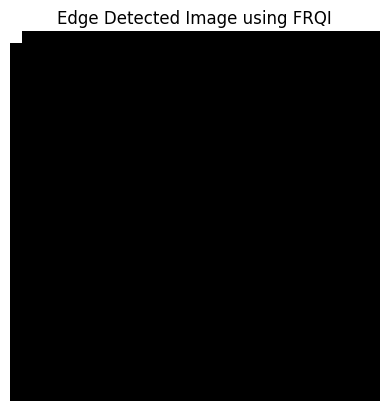

In [5]:
# Function to reconstruct and display the edge-detected image
def reconstruct_edge_image(counts, image_shape):
    edge_image = np.zeros(image_shape)  # Initialize an empty array for edge-detected image
    
    # Reconstruct the image from measurement results
    for bitstring, count in counts.items():
        index = int(bitstring[:-1], 2)  # Exclude the last qubit which is the intensity qubit
        edge_image[np.unravel_index(index, image_shape)] = count
    
    # Normalize the image to display it properly
    edge_image = edge_image / edge_image.max()
    
    # Step 5: Display the edge-detected image
    plt.imshow(edge_image, cmap='gray')
    plt.title("Edge Detected Image using FRQI")
    plt.axis('off')
    plt.show()

# Example usage
reconstruct_edge_image(counts, image_array.shape)
